# Graphing and Plotting

### Importing Necessary Libraries

In [80]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

### Reading in the formatted bike share data
Retrieved from the JSON file formatted in another notebook

In [81]:
df = pd.read_json('cleaned_bike_share_data.json')

### Generating a scatterplot of the number of bikes used between 2011 - 2012

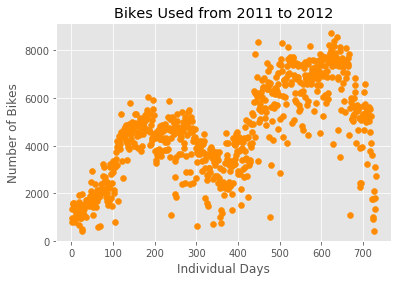

In [82]:
plt.scatter(df.instant, df.cnt, c='darkorange')
plt.xlabel('Individual Days')
plt.ylabel('Number of Bikes')
plt.title('Bikes Used from 2011 to 2012')
plt.style.use('ggplot')
plt.show()

## Creating a Polynomial Regression Line
### Tools used:
- ScikitLearn - For LinearRegression, fitting the model, and predicting y-values
- Matplotlib - For generating our graph with the regression line


The data was converted by using a simple linear regression line in order to normalize the increasing trend from the first year to the next.  The residual differences between the predicted values from the regression line and the actual values was then used as the new dependent variable in place of the bike count.

The regression line was found using ScikitLearn's LinearRegression function. 

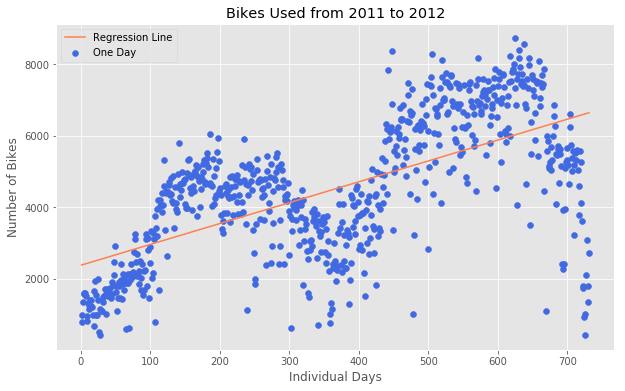

(2380.2874823889765, 5.826809020811185)

In [83]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

# Assigning proper values
x=df.instant.values.reshape(-1,1)
y=df.cnt.values.reshape(-1,1)

# Simple Linear Regression Line

model = LinearRegression()
model.fit(x, y)

predictions = model.predict(x)

# Plotting
plt.scatter(df['instant'], df['cnt'], label='One Day', c='royalblue')
plt.plot(df['instant'],predictions,c='coral', label='Regression Line')
plt.xlabel('Individual Days')
plt.ylabel('Number of Bikes')
plt.title('Bikes Used from 2011 to 2012')
plt.legend()
plt.show()

model.intercept_[0], model.coef_[0][0]


### Calculating the Residuals

In [84]:
# Storing predicted values into a new column
df['predictions'] = predictions
df['resids'] = df.cnt - df.predictions
df

,atemp,casual,clear,cnt,dteday,fall,holiday,hum,instant,light_storm,...,temp,weather,weathersit,weekday,windspeed,winter,workingday,yr,predictions,resids
0,0.363625,331,1,985,734138,0,0,0.805833,1,0,...,0.344167,clear,2,6,0.160446,1,0,0,2386.114291,-1401.114291
1,0.353739,131,1,801,734139,0,0,0.696087,2,0,...,0.363478,clear,2,0,0.248539,1,0,0,2391.941100,-1590.941100
2,0.189405,120,0,1349,734140,0,0,0.437273,3,0,...,0.196364,misty,1,1,0.248309,1,1,0,2397.767909,-1048.767909
3,0.212122,108,0,1562,734141,0,0,0.590435,4,0,...,0.200000,misty,1,2,0.160296,1,1,0,2403.594718,-841.594718
4,0.229270,82,0,1600,734142,0,0,0.436957,5,0,...,0.226957,misty,1,3,0.186900,1,1,0,2409.421527,-809.421527
5,0.233209,88,0,1606,734143,0,0,0.518261,6,0,...,0.204348,misty,1,4,0.089565,1,1,0,2415.248337,-809.248337
6,0.208839,148,1,1510,734144,0,0,0.498696,7,0,...,0.196522,clear,2,5,0.168726,1,1,0,2421.075146,-911.075146
7,0.162254,68,1,959,734145,0,0,0.535833,8,0,...,0.165000,clear,2,6,0.266804,1,0,0,2426.901955,-1467.901955
8,0.116175,54,0,822,734146,0,0,0.434167,9,0,...,0.138333,misty,1,0,0.361950,1,0,0,2432.728764,-1610.728764
9,0.150888,41,0,1321,734147,0,0,0.482917,10,0,...,0.150833,misty,1,1,0.223267,1,1,0,2438.555573,-1117.555573


In [85]:
df.to_pickle('Residuals_df')

### Graphing the residual values derived from the function above
The residual function and its returned values have normalized the increasing trend from the bike count.

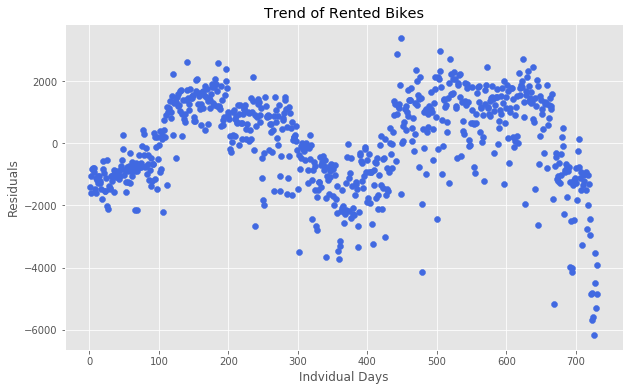

In [86]:
# Scatterplot of our Residuals
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.scatter(df.instant, df.resids, c="royalblue")
plt.xlabel('Indvidual Days')
plt.ylabel("Residuals")
plt.title("Trend of Rented Bikes")

plt.show()

### Summary Table of the Model between the Residual Values and Selected Features

In [180]:
lr_model = ols(formula='resids~hum*(fall+summer+winter)*(clear+light_storm)', data=df).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 resids   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     37.00
Date:                Thu, 22 Aug 2019   Prob (F-statistic):          4.81e-102
Time:                        13:37:18   Log-Likelihood:                -6089.2
No. Observations:                 730   AIC:                         1.222e+04
Df Residuals:                     707   BIC:                         1.233e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -372.2460    410.151     -0.908      0.364   -1177.507     433.015
hum                     2192.1990    731.964      2.995      0.003     755.117    3629.281
fall                   -1136.1238    766.559     -1.482      0.139   -2641.129     368.882
summer                  2498.2152    676.168      3.695      0.000    1170.677    3825.753
winter                 -1421.3213    649.890     -2.187      0.029   -2697.266    -145.377
hum:fall                 787.7574   1274.079      0.618      0.537   -1713.673    3289.188
hum:summer             -3791.5846   1183.295     -3.204      0.001   -6114.777   -1468.392
hum:winter             -1176.9341   1181.099     -0.996      0.319   -3495.814    1141.946
clear                   -263.2398    975.723     -0.270      0.787   -2178.902    1652.422
light_storm            -1929.4002   1107.619     -1.742      0.082   -4104.015     245.215
hum:clear              -1300.1976   1388.706     -0.936      0.349   -4026.679    1426.284
hum:light_storm        -2386.6987   1533.882     -1.556      0.120   -5398.208     624.810
fall:clear              1330.4448   1527.375      0.871      0.384   -1668.290    4329.179
fall:light_storm        7632.1874   1.12e+04      0.679      0.497   -1.44e+04    2.97e+04
summer:clear            4360.0610   1859.233      2.345      0.019     709.782    8010.340
summer:light_storm      1156.2052    712.610      1.622      0.105    -242.879    2555.290
winter:clear            1306.9028   1284.400      1.018      0.309   -1214.793    3828.598
winter:light_storm     -2065.5616   4777.230     -0.432      0.666   -1.14e+04    7313.693
hum:fall:clear         -1480.9978   2170.997     -0.682      0.495   -5743.371    2781.376
hum:fall:light_storm   -7381.9316   1.24e+04     -0.595      0.552   -3.17e+04     1.7e+04
hum:summer:clear       -4980.4455   2678.122     -1.860      0.063   -1.02e+04     277.578
hum:summer:light_storm  1000.5996    616.704      1.622      0.105    -210.192    2211.391
hum:winter:clear       -1204.8998   1912.430     -0.630      0.529   -4959.622    2549.823
hum:winter:light_storm  4307.7113   5593.995      0.770      0.442   -6675.120    1.53e+04
==============================================================================
Omnibus:                      114.489   Durbin-Watson:                   0.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.250
Skew:                          -0.880   Prob(JB):                     1.51e-53
Kurtosis:                       5.213   Cond. No.                     2.88e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.72e-32. This mig

## Graphing Features

### Feature interaction of temperature and season

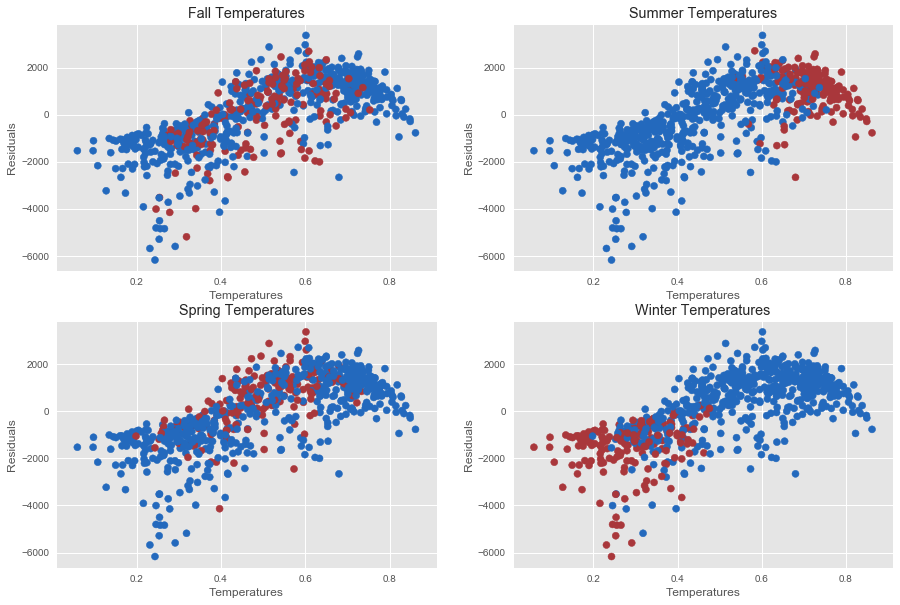

In [169]:
# Relationship between Residuals and temperature per each season
plt.style.use('ggplot')
fig, ax = plt.subplots(2,2, figsize=(15,10))

# Variables to change
# Interaction between season and temperature
Y = df['resids']
X = df['temp']
season = ['fall', 'summer', 'winter', 'spring']
resid = 'Residuals'
feat = 'Temperatures'

# Plotting each graph
ax[0,0].scatter(X, Y, c=df[f'{season[0]}'], cmap='vlag')
ax[0,0].set_xlabel(f'{feat}')
ax[0,0].set_ylabel(f'{resid}')
ax[0,0].set_title(f'{season[0].capitalize()} {feat}')

ax[0,1].scatter(X, Y, c=df[f'{season[1]}'], cmap='vlag')
ax[0,1].set_xlabel(f'{feat}')
ax[0,1].set_ylabel(f'{resid}')
ax[0,1].set_title(f'{season[1].capitalize()} {feat}')

ax[1,1].scatter(X, Y, c=df[f'{season[2]}'], cmap='vlag')
ax[1,1].set_xlabel(f'{feat}')
ax[1,1].set_ylabel(f'{resid}')
ax[1,1].set_title(f'{season[2].capitalize()} {feat}')

ax[1,0].scatter(X, Y, c=df[f'{season[3]}'], cmap='vlag')
ax[1,0].set_xlabel(f'{feat}')
ax[1,0].set_ylabel(f'{resid}')
ax[1,0].set_title(f'{season[3].capitalize()} {feat}')

plt.show()

### Feature interaction of humidity and season

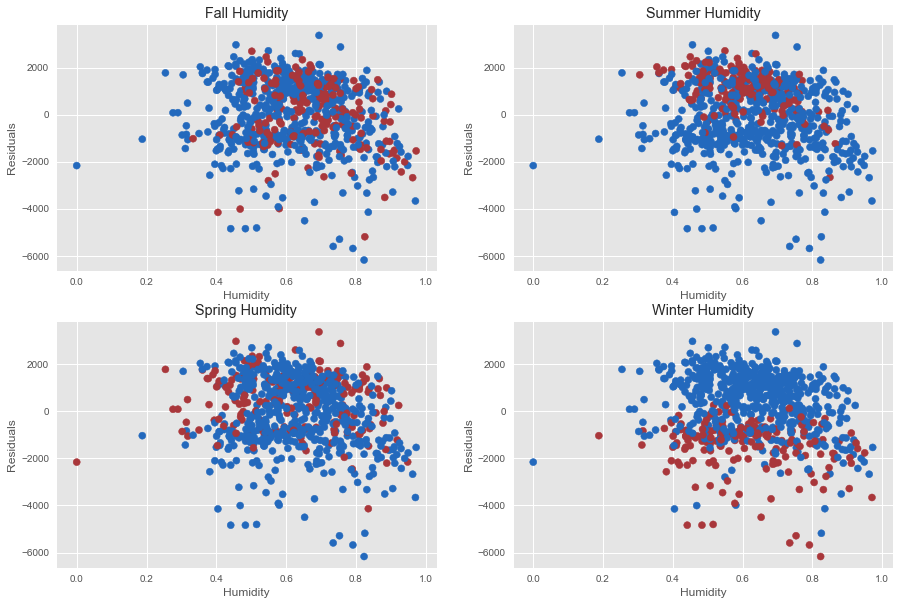

In [181]:
# Relationship between Residuals and humidity per each season
plt.style.use('ggplot')
fig, ax = plt.subplots(2,2, figsize=(15,10))

# Variables to change
# Interaction between humidity and temperature
Y = df['resids']
X = df['hum']
season = ['fall', 'summer', 'winter', 'spring']
resid = 'Residuals'
feat = 'Humidity'

# Plotting each graph
ax[0,0].scatter(X, Y, c=df[f'{season[0]}'], cmap='vlag')
ax[0,0].set_xlabel(f'{feat}')
ax[0,0].set_ylabel(f'{resid}')
ax[0,0].set_title(f'{season[0].capitalize()} {feat}')

ax[0,1].scatter(X, Y, c=df[f'{season[1]}'], cmap='vlag')
ax[0,1].set_xlabel(f'{feat}')
ax[0,1].set_ylabel(f'{resid}')
ax[0,1].set_title(f'{season[1].capitalize()} {feat}')

ax[1,1].scatter(X, Y, c=df[f'{season[2]}'], cmap='vlag')
ax[1,1].set_xlabel(f'{feat}')
ax[1,1].set_ylabel(f'{resid}')
ax[1,1].set_title(f'{season[2].capitalize()} {feat}')

ax[1,0].scatter(X, Y, c=df[f'{season[3]}'], cmap='vlag')
ax[1,0].set_xlabel(f'{feat}')
ax[1,0].set_ylabel(f'{resid}')
ax[1,0].set_title(f'{season[3].capitalize()} {feat}')

plt.show()

#### Features interaction of weather and humidity

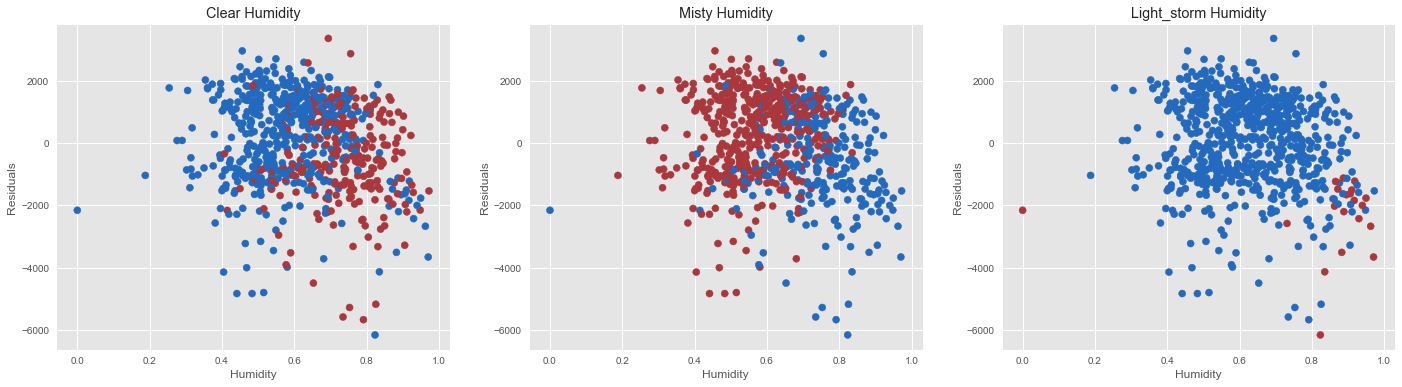

In [198]:
# Relationship between Residuals and weather per each season
plt.style.use('ggplot')
fig, ax = plt.subplots(1,3, figsize=(24,6))

# Variables to change
# Interaction between humidity and weather
Y = df['resids']
X = df['hum']
weather = ['clear', 'misty', 'light_storm']
resid = 'Residuals'
feat = 'Humidity'

# Plotting each graph

for i in range(len(weather)):
    ax[i].scatter(X, Y, c=df[f'{weather[i]}'], cmap='vlag')
    ax[i].set_xlabel(f'{feat}')
    ax[i].set_ylabel(f'{resid}')
    ax[i].set_title(f'{weather[i].capitalize()} {feat}')

plt.show()